# Big Mart Sales Prediction

Big Mart Sales data set is a collection of about 8000 rows and 12 columns. The aim is to build a predictive model and predict the sales of each product at a particular outlet. Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales. Firstly, the data contains some missing values. The data is intially cleaned, imputed and then the necessary operations are carried out to perform linear regression to predict the sales on the data. 

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the training and testing data.
train = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/projects/train.csv')
test = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/projects/test.csv')

In [3]:
#Fetching training and testing data.
train['source']='train'
test['source']='test'

In [4]:
#Checking the train data.
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
#Checking the test data.
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [6]:
#Merging the train and test data to perform operations.
data = pd.concat([train,test], ignore_index = True, sort = True)
data.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [7]:
#Rechecking the shape of train and test data.
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

### Exploratory Data Analysis 

In this section we are going to look at the data and find out the features of the data. This enables us to decide what further has to be done to prepare the data. 

In [8]:
#Analysing the statistical measures of the data.
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [9]:
#Checking for the null values in the data.
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

We can see there are 3 parameters which have null values. Out of which Item weight and outlet size values have to be filled. The outlet sales are the ones which belong to the test data. 

In [10]:
#Checking for the count of unique values in the data. 
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [11]:
#Sum of all the null values in the data. 
data.isnull().values.sum()

12136

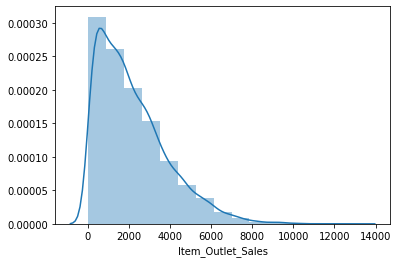

In [12]:
#Plotting the distribution of target variable.
sns.distplot(data['Item_Outlet_Sales'], bins = 15)

In [13]:
#Checking the categorical fatures in the data.
categorical_features = data.select_dtypes(include = [np.object]) 
categorical_features

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,Meat,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,Household,OUT013,Tier 3,High,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
14199,Regular,FDB58,Snack Foods,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,Starchy Foods,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,Health and Hygiene,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,Canned,OUT017,Tier 2,NaN,Supermarket Type1,test


In [14]:
#Checking for the numerical variables in the data.
numerical_features = data.select_dtypes(include = np.number) #check
numerical_features

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,249.8092,3735.1380,0.016047,9.30,1999
1,48.2692,443.4228,0.019278,5.92,2009
2,141.6180,2097.2700,0.016760,17.50,1999
3,182.0950,732.3800,0.000000,19.20,1998
4,53.8614,994.7052,0.000000,8.93,1987
...,...,...,...,...,...
14199,141.3154,NaN,0.013496,10.50,1997
14200,169.1448,NaN,0.142991,7.60,2009
14201,118.7440,NaN,0.073529,10.00,2002
14202,214.6218,NaN,0.000000,15.30,2007


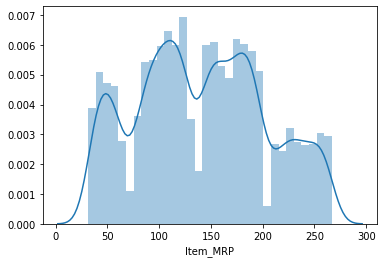

In [15]:
#Checking the distribution of predictor variables.
sns.distplot(data['Item_MRP'])

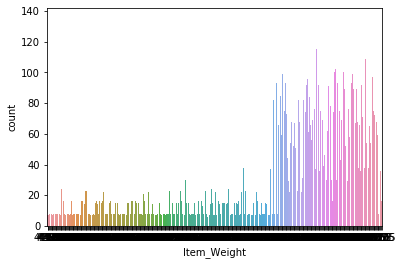

In [16]:
#Plotting the various item weight counts. 
sns.countplot(data['Item_Weight'])

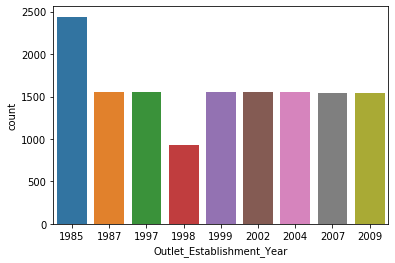

In [17]:
#Plotting the various establishment year values.
sns.countplot(data['Outlet_Establishment_Year'])

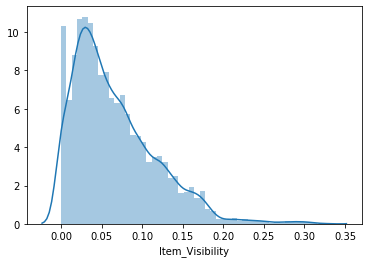

In [18]:
#Plotting the distribution of item visibility.
sns.distplot(data['Item_Visibility'])

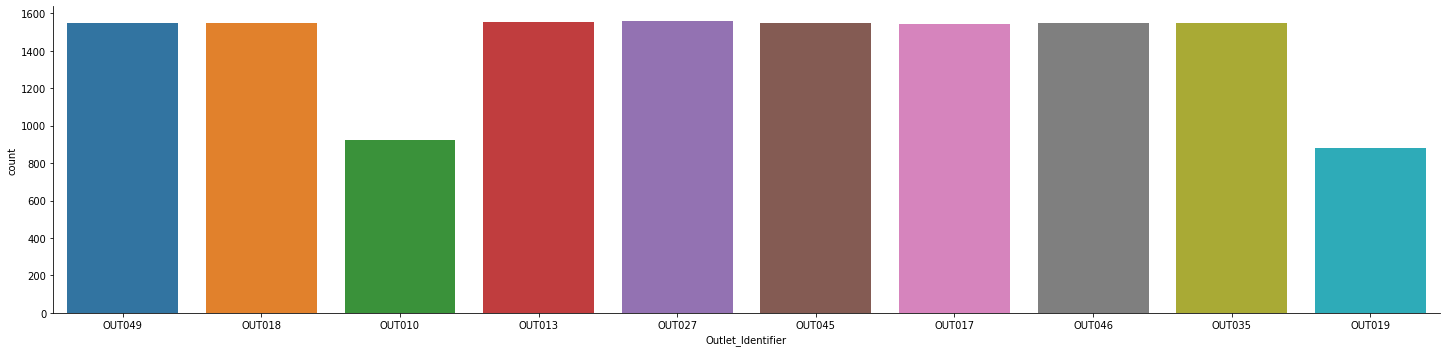

In [19]:
#Checking the various outlet types
sns.catplot('Outlet_Identifier', kind = 'count', data = data, aspect = 4 )

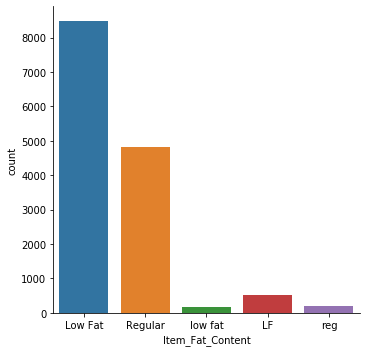

In [20]:
#Checking the variations in the fat type.
sns.catplot('Item_Fat_Content', kind = 'count', data = data)

In [21]:
#Replacing Lf and reg to Low fat and Regular.
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

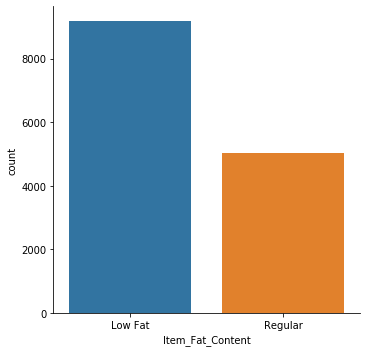

In [22]:
#Rechecking the fat content types.
sns.catplot('Item_Fat_Content', kind = 'count', data = data)

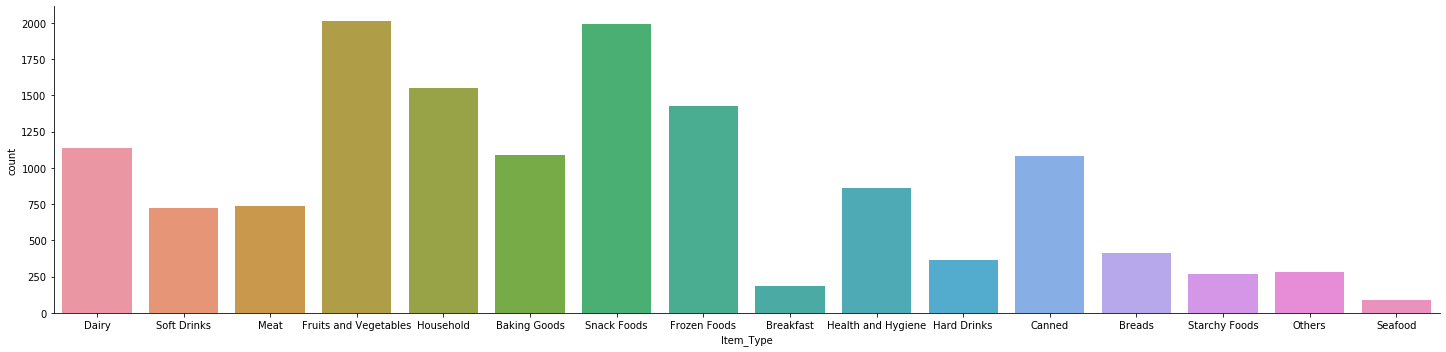

In [23]:
#Plotting the various item types. 
sns.catplot('Item_Type', kind = 'count', data = data, aspect = 4)

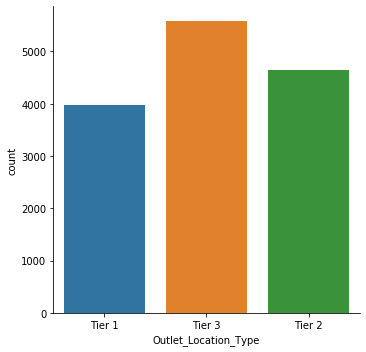

In [24]:
#Plotting the location of the outlets.
sns.catplot('Outlet_Location_Type', kind = 'count', data = data, aspect = 1)

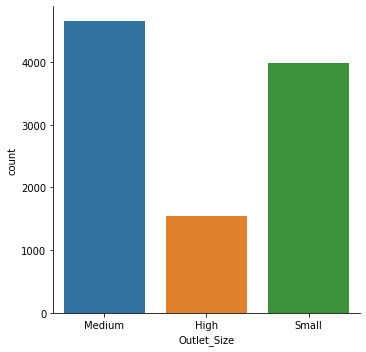

In [25]:
#Plotting the size of the outlets. 
sns.catplot('Outlet_Size', kind = 'count', data = data, aspect = 1)

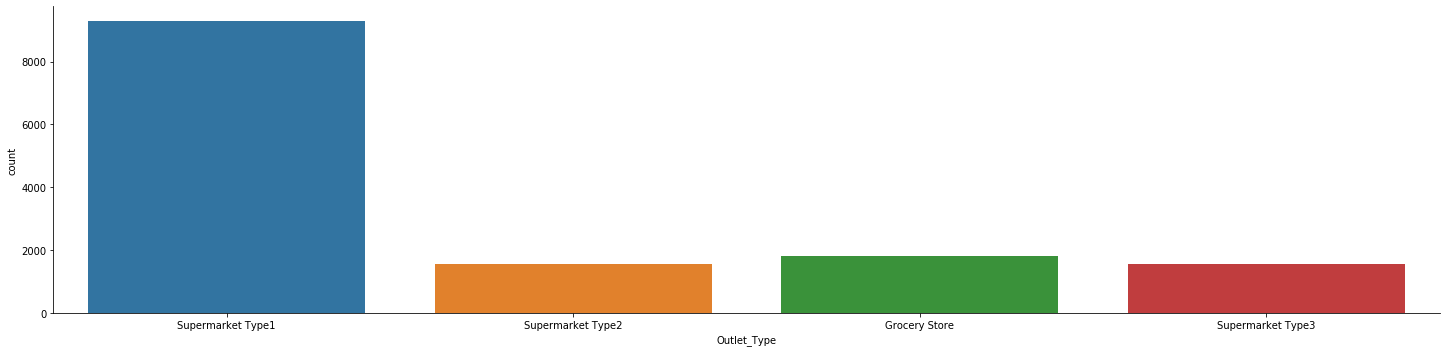

In [26]:
#Plotting the various outlet types. 
sns.catplot('Outlet_Type', kind = 'count', data = data, aspect = 4)

### Missing Value Imputation

As noticed before here we are replacing the missing values.

In [27]:
#Filling the missing values with mean value.
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

The missing values in item weight can be filled with the mean of all the present data. So, that operation is being performed.

In [28]:
#Checking if there are any missing values after replacing all with mean values. 
data['Item_Weight'].isnull().sum()

0

Post the operation we notice that there are no missing values. 

In [29]:
#Importing the necessary library.
from scipy.stats import mode

In [30]:
#Filling the missing categorical values by using the most frequent values in the column.
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].value_counts().index[0]) 

Since, outlet size is a categorical data we are filling it with the mode that is the maximum occuring data in the set.

In [31]:
#Rechecking the missing values in the column. 
data['Outlet_Size'].isnull().sum()

0

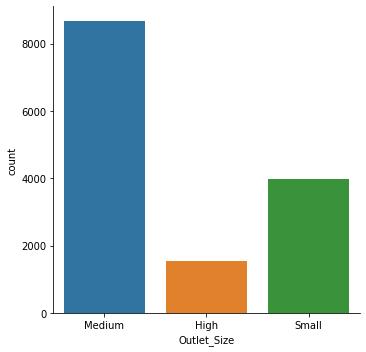

In [32]:
sns.catplot('Outlet_Size', kind = 'count', data = data, aspect = 1)

In [33]:
#Rechecking if there are any null valus in the data.
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

After we fill in the values we see that there are no null in the data except the predictor variable. 

In [34]:
#Replacing the zero values of item visibility with the mean value.
data['Item_Visibility'] = data['Item_Visibility'].replace(0, data['Item_Visibility'].mean())

Here, we see that the item visibility value is zero which cannot be the case in reality. So, we are replacing all the zeros with the mean values. 

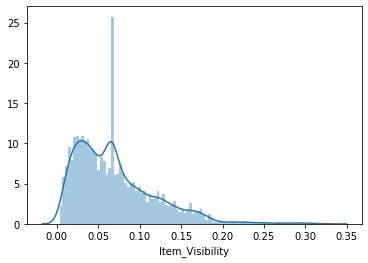

In [35]:
#Plotting the data. 
sns.distplot(data['Item_Visibility'], bins = 100)

In [36]:
#Checking the new statistical measures of the data. 
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.070034,12.792854,1997.830681
std,62.086938,1706.499616,0.048602,4.234226,8.371664
min,31.290000,33.290000,0.003575,4.555000,1985.000000
25%,94.012000,834.247400,0.033143,9.300000,1987.000000
50%,142.247000,1794.331000,0.062347,12.792854,1999.000000
75%,185.855600,3101.296400,0.094037,16.000000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


### Feature Engineering

In [37]:
#Combining the item types into three broad categories. 
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'DR': 'Drinks', 'NC': 'Non Consumables'})

In [38]:
#Checking the vlaues of item categories after merging into categories. 
data['Item_Type_Combined'].value_counts()

Food               10201
Non Consumables     2686
Drinks              1317
Name: Item_Type_Combined, dtype: int64

In the above code we are grouping the food into solids, non consumables, and drinks. 

In [39]:
#Creating another column to count the number of years back the outle has been established. 
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

To understand for how many years the store has been perative we are creating a new column to calculate the number of operative years.

In [40]:
#Checking the statistical measures of the nw column. 
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [41]:
#Creating a new type "non-edible" in the fat content column. 
data['Item_Fat_Content'][(data['Item_Type_Combined'] == 'Non Consumables')] = 'Non Edible' #Method 1
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [42]:
#data.loc[data['Item_Type_Combined']=='Non Consumables','Item_Fat_Content'] = 'Non Edible' #Method 2

In [43]:
#Rechecking the values of the item fat content.
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non Edible    2686
Name: Item_Fat_Content, dtype: int64

In [44]:
#Checking the statistical measures of the values after feature enginnering.
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Years
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.070034,12.792854,1997.830681,15.169319
std,62.086938,1706.499616,0.048602,4.234226,8.371664,8.371664
min,31.290000,33.290000,0.003575,4.555000,1985.000000,4.000000
25%,94.012000,834.247400,0.033143,9.300000,1987.000000,9.000000
50%,142.247000,1794.331000,0.062347,12.792854,1999.000000,14.000000
75%,185.855600,3101.296400,0.094037,16.000000,2004.000000,26.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,28.000000


In [71]:
#Checking the data. 
data.head(5)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Outlet_Years,Price_Per_Unit,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,train,14,26.861204,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,train,4,8.153581,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,train,14,8.092457,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.065953,19.20,OUT010,train,15,9.484115,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.065953,8.93,OUT013,train,26,6.031512,0,...,0,1,0,0,0,0,0,0,0,0


In [46]:
#Creating a new column for calculating the price for each item. 
data['Price_Per_Unit'] = data['Item_MRP']/data['Item_Weight']
data['Price_Per_Unit'].describe()

count    14204.000000
mean        12.494400
std          7.633324
min          1.665236
25%          6.944100
50%         11.013092
75%         15.872715
max         50.775731
Name: Price_Per_Unit, dtype: float64

### Label Encoding and One Hot Encoding 

The encoding is basically performed to replace the catergorical values with numbers as we cannot use categorical variables in a regression equation. 

In [72]:
#Importing the necessary library.
from sklearn.preprocessing import OneHotEncoder

In [73]:
#Calling the library.
le = LabelEncoder()

In [49]:
#Transforimg the outlet values
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [50]:
#Tranforimg the values. 
var_mod = ['Item_Fat_Content', 'Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [51]:
#Getting the dummies for all the values. 
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                                      'Item_Type_Combined','Outlet'])

In [52]:
#Checking the data types after transformation.
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Price_Per_Unit               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [53]:
#Rechecking the dummies. 
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


### Exporting Data

In [54]:
#Dropping the converted columns.
data.drop(['Item_Type','Outlet_Establishment_Year'], axis = 1, inplace = True) #Columns converted are dropped

In [55]:
#Splitting the data back into test and train.
train = data.loc[data['source'] == 'train']  #Divide into test and train back
test = data.loc[data['source'] == 'test']

In [56]:
#Dropping columns from test and train data. 
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source','Item_Identifier'],axis=1,inplace=True)

In [57]:
#Dropping column from train data.
train.drop(['Outlet_Identifier'], axis = 1, inplace = True)

In [58]:
#Creating seperate csv files for test and train data. 
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

### Model Building

In [59]:
#Importing the necessary library.
from sklearn.linear_model import LinearRegression

In [60]:
#Adding the test and train data.
X = train.drop(['Item_Outlet_Sales'], axis='columns')
y = train['Item_Outlet_Sales'].values.reshape(-1,1)

In [61]:
#Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 1)

In [62]:
#Checking the shape of the data.
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6392, 31) (6392, 1) (2131, 31) (2131, 1)


In [63]:
#Checking the top values of train data.
X_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Price_Per_Unit,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
6130,171.7080,0.110235,7.10,11,24.184225,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4961,255.5356,0.074339,12.60,6,20.280603,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1095,154.3998,0.111420,8.02,9,19.251845,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5082,133.1942,0.122392,15.70,26,8.483707,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1377,117.2492,0.008560,11.80,9,9.936373,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [64]:
#Checking the top values of train data. 
y_train

array([[3115.944 ],
       [9664.7528],
       [3383.5956],
       ...,
       [2247.075 ],
       [  44.6086],
       [2293.0152]])

In [65]:
#Checking the top values of test data.
X_test.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Price_Per_Unit,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
1070,37.0874,0.055102,13.500000,11,2.747215,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6305,87.9198,0.074035,12.500000,4,7.033584,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8504,111.7544,0.124111,12.792854,28,8.735689,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5562,87.1198,0.073735,12.500000,16,6.969584,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1410,40.8480,0.007140,15.850000,26,2.577161,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [66]:
#Checking the top values of test data.
y_test

array([[ 952.7598],
       [1133.8574],
       [4138.6128],
       ...,
       [ 481.3734],
       [3089.9778],
       [ 798.96  ]])

In [67]:
#Calling the model.
model = LinearRegression(normalize = True)

In [68]:
#Fitting the model.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
#Predicting the values. 
y_pred = (model.predict(X_test))
y_pred

array([[ 536.],
       [1212.],
       [3216.],
       ...,
       [ 608.],
       [2248.],
       [1044.]])

In [70]:
#Checking the accuracy score of train data. 
model.score(X_train,y_train)

(0.5629686345637808, 0.5652350025222881)

In [77]:
from sklearn import metrics
acc = metrics.r2_score(y_test, y_pred)*100
print('R2_Score',acc)

met = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', met)
    

var = (metrics.explained_variance_score(y_test, y_pred))
print('Explained_Variance : ', var)
    
error = (metrics.max_error(y_test, y_pred))
print('Max_Error : ', error)
    
err = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error", err)

R2_Score 56.52350025222881
RMSE :  1122.0741144974625
Explained_Variance :  0.5654449902067444
Max_Error :  6044.648999999999
Mean Absolute Error 837.2511967151572


### Predicting on Test Data 

In [81]:
solution = pd.read_csv("test_modified.csv")
solution.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)
solution.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Price_Per_Unit,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,107.8622,0.007565,20.750000,14,5.198178,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,87.3198,0.038428,8.300000,6,10.520458,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,241.7538,0.099575,14.600000,15,16.558479,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,155.0340,0.015388,7.315000,6,21.193985,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,234.2300,0.118599,12.792854,28,18.309440,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
sol = model.predict(solution)
sol[:10]

array([[1812.],
       [1584.],
       [1888.],
       [2580.],
       [5208.],
       [1944.],
       [ 580.],
       [2800.],
       [1512.],
       [3044.]])

As we have seen the accuracy measure of the model is onyl 56%. To improve it we can perform correlation analysis on the variables and build the model only with those attributes which have high correlation with the sales value. Also, other prediction suitable algorithms can be used to predict the accuracy and the best can be choosen. Hyperparameter tuning is another way to improve the performance of the model. 